# **Lab 18: Quantum Error Correction**
---

### **Description**
In this week's lab, we will implement a bit flip error correcting code and simulate circuits with several different noise models in Cirq.

<br>

### **Structure**
**Part 1**: [Bit Flip Code](#p1)

**Part 2**: [Cirq Noise Models](#p2)



<br>

### **Learning Objectives**
By the end of this lab, we will:
* Recognize how to implement a bit flip code using cirq.
* Recognize how to test an error correcting code using cirq generally and with noise models.

<br>

### **Resources**
* [Noisy Simulations Cheat Sheet
](https://docs.google.com/document/d/1Ex2m3dp5-_z8XN8EiBv6PUptHWrTLDpsKYU662oTy4A/edit#heading=h.exb19quwqzr9)

* [Cirq Cheat Sheet](https://docs.google.com/document/d/1j0vEwtS6fK-tD1DWAPry4tJdxEiq8fwMtXuYNGRhK_M)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range(2 ** num_qubits)]
plt.rcParams.update({'font.size': 8})

try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install cirq --quiet
    import cirq
    print("installed cirq.")

installing cirq...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.6 MB/s eta 0:00:00
     ━━

<a name = "p1"></a>

---
## **Part 1: Bit Flip Code**
---

In this section, we will implement and explore a 3-qubit bit flip error correcting code using our 5 step process:
1. Encoding
2. Sending Over Noisy Channel
3. Error Detection
4. Error Correction
5. Decoding

#### **Step #1: Encoding**

**Together**, let's create a 3-qubit bit flip encoded quantum circuit. Specifically,
1. Initialize a circuit with 3 qubits.

2. Entangle the state of $q_0$ with the other two qubits.

##### **1. Initialize a circuit with 3 qubits and 1 classical bit.**

In [ ]:
qubits = # COMPLETE THIS CODE
encode_circuit = # COMPLETE THIS CODE

###### **Solution**

In [ ]:
qubits = cirq.NamedQubit.range(3, prefix = 'q')
encode_circuit = cirq.Circuit()

##### **2. Entangle the state of $q_0$ with the other two qubits.**

This can be accomplished by applying two CNOT gates controlled by $q_0$ and targeting the other qubits, $q_1$ and $q_2$.

In [ ]:
encode_circuit.# COMPLETE THIS CODE
encode_circuit.# COMPLETE THIS CODE

encode_circuit

###### **Solution**

In [ ]:
encode_circuit.append(cirq.CNOT(qubits[0], qubits[1]))
encode_circuit.append(cirq.CNOT(qubits[0], qubits[2]))

encode_circuit

q0: ───@───@───
       │   │
q1: ───X───┼───
           │
q2: ───────X───

#### **Step #2: Sending Over Noisy Channel**

**Together**, let's create a new circuit to represent the noisy channel and sepcifically simulate a bit-flip error on $q_0$. **Hint**: What gate flips a qubit from $|0\rangle$ to $|1\rangle$?

In [ ]:
noisy_channel_circuit = # COMPLETE THIS CODE

noisy_channel_circuit.# COMPLETE THIS CODE

noisy_channel_circuit

##### **Solution**

In [ ]:
noisy_channel_circuit = cirq.Circuit()

noisy_channel_circuit.append(cirq.X(qubits[0]))

noisy_channel_circuit

q0: ───X───

#### **Step #3: Error Detection**

Next, we will create a circuit to detect if there's been an error by checking the *parity* (do they agree with each other or are they different?) of $q_0$ with the other qubits using CNOT gates.

In [ ]:
detection_circuit = # COMPLETE THIS CODE

detection_circuit.# COMPLETE THIS CODE
detection_circuit.# COMPLETE THIS CODE

detection_circuit

##### **Solution**

In [ ]:
detection_circuit = cirq.Circuit()

detection_circuit.append(cirq.CNOT(qubits[0], qubits[1]))
detection_circuit.append(cirq.CNOT(qubits[0], qubits[2]))

detection_circuit

q0: ───@───@───
       │   │
q1: ───X───┼───
           │
q2: ───────X───

#### **Step #4: Error Correction**

We will now create a circuit to update $q_0$ if both $q_1$ and $q_2$ have detected a bit flip so that $q_0$ stores the correct logical state. Specifically, apply the Toffoli (CCX) gate controlled by $q_2$ and $q_1$, targeting $q_0$.

In [ ]:
correction_circuit = # COMPLETE THIS CODE

correction_circuit.# COMPLETE THIS CODE

correction_circuit

##### **Solution**

In [ ]:
correction_circuit = cirq.Circuit()

correction_circuit.append(cirq.CCNOT(qubits[2], qubits[1], qubits[0]))

correction_circuit

q0: ───X───
       │
q1: ───@───
       │
q2: ───@───

#### **Step #5: Decoding**

Lastly, the logical state has been stored in $q_0$, so we will
create a decoding circuit to measure this qubit in order to decode the final logical state.

In [ ]:
decode_circuit = # COMPLETE THIS CODE

decode_circuit.# COMPLETE THIS CODE

decode_circuit

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
decode_circuit = cirq.Circuit()

decode_circuit.append(cirq.measure(qubits[0]))

decode_circuit

q0: ───M───

#### **Problem #1.1**

Now, let's simulate the results of performing each of these steps by adding the circuits together and simulating 100 times (to ensure our error correction code really works).

<br>

**Before looking at the result, let's ask ourselves: what state should we expect to measure?**

In [ ]:
bitflip_circuit = encode_circuit + # COMPLETE THIS CODE

# COMPLETE THIS CODE


hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

##### **Solution**

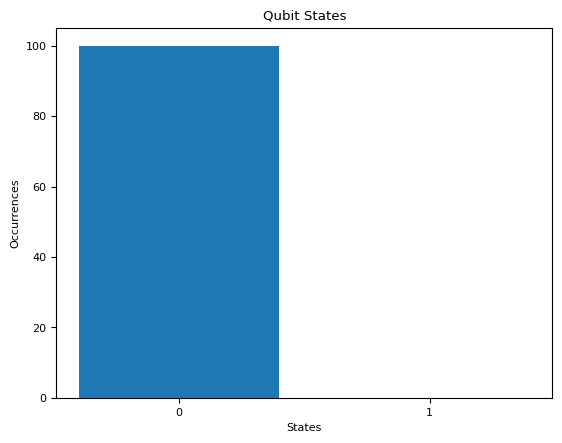

In [ ]:
bitflip_circuit = encode_circuit + noisy_channel_circuit + detection_circuit + correction_circuit + decode_circuit

sim = cirq.Simulator()
result = sim.run(bitflip_circuit, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

#### **Problem #1.2**

**Together**, let's use our code from above so that the logical qubit is in the $|1\rangle$ state instead of the $|0\rangle$ state.

<br>

**NOTE**: Since we have built the step encoding from logical to physical qubits already, we only need to prepare the $q_0$ in the desired state.

In [ ]:
# PREPARATION
prepare_circuit = # COMPLETE THIS CODE

# SIMULATING
bitflip_circuit = prepare_circuit + encode_circuit + noisy_channel_circuit + detection_circuit + correction_circuit + decode_circuit

sim = cirq.Simulator()
result = sim.run(bitflip_circuit, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

##### **Solution**

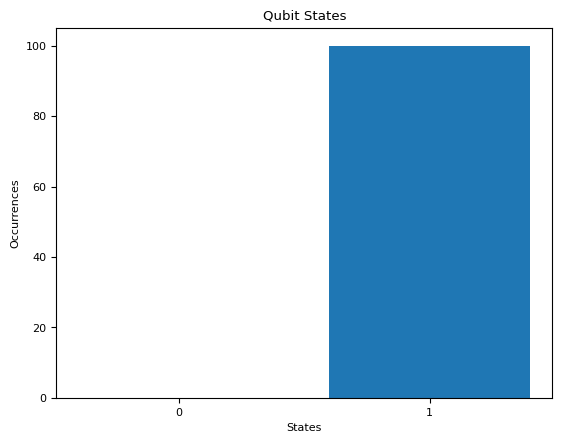

In [ ]:
# PREPARATION
prepare_circuit = cirq.Circuit()
prepare_circuit.append(cirq.X(qubits[0]))

# SIMULATING
bitflip_circuit = prepare_circuit + encode_circuit + noisy_channel_circuit + detection_circuit + correction_circuit + decode_circuit

sim = cirq.Simulator()
result = sim.run(bitflip_circuit, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

#### **Problem #1.3**

Now modify the code to prepare the logical qubit in the $|+\rangle$ state.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

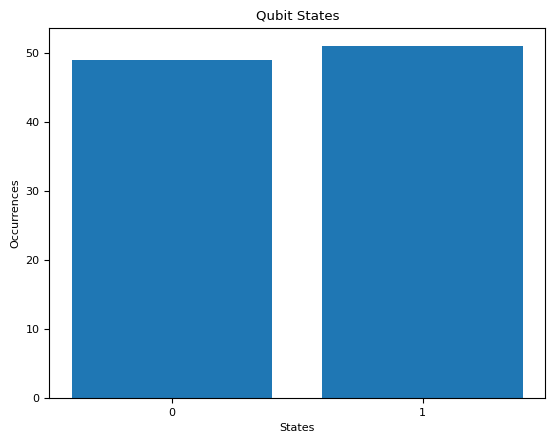

In [ ]:
# PREPARATION
prepare_circuit = cirq.Circuit()
prepare_circuit.append(cirq.H(qubits[0]))

# SIMULATING
bitflip_circuit = prepare_circuit + encode_circuit + noisy_channel_circuit + detection_circuit + correction_circuit + decode_circuit

sim = cirq.Simulator()
result = sim.run(bitflip_circuit, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

#### **Problem #1.4**

You hopefully saw a mix of 0s and 1s indicating a roughly equal superposition. However, it's hard to tell if this is $|+\rangle$ or if it's incurred an error and is now $|-\rangle$ or even a different superposition.

<br>

Add a gate to $q_0$ right before decoding to rotate it's state into the computational basis so that we can be sure if the error has been corrected. **Hint**: Assuming $q_0$ is in $|+\rangle$ state, what gate can we apply so that it ends up as $|0\rangle$?

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

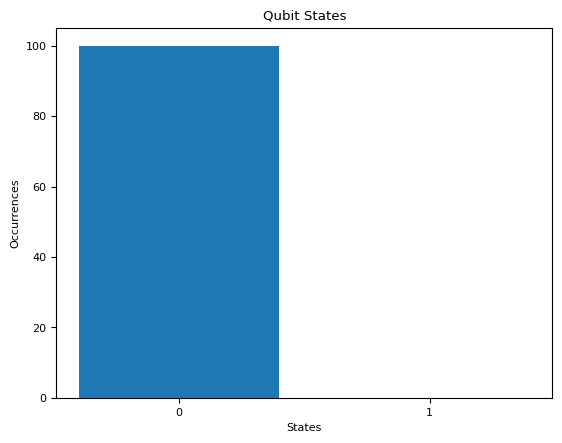

In [ ]:
# PREPARATION
prepare_circuit = cirq.Circuit()
prepare_circuit.append(cirq.H(qubits[0]))

# SIMULATING
bitflip_circuit = prepare_circuit + encode_circuit + noisy_channel_circuit + detection_circuit + correction_circuit + cirq.H(qubits[0]) + decode_circuit

sim = cirq.Simulator()
result = sim.run(bitflip_circuit, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

#### **Problem #1.5**

Modify the code so that the logical qubit is in the $|0\rangle$ state, but there is a bit flip error on $q_1$ instead of $q_0$.

<br>

**Does our code still work?**

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

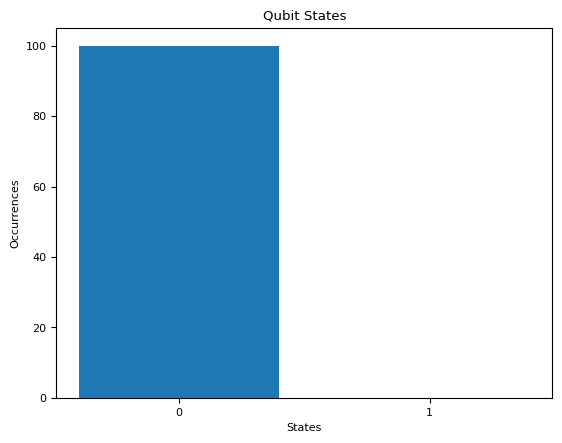

In [ ]:
# NOISY CHANNEL
noisy_channel_circuit = cirq.Circuit()
noisy_channel_circuit.append(cirq.X(qubits[1]))

# SIMULATING
bitflip_circuit =encode_circuit + noisy_channel_circuit + detection_circuit + correction_circuit + decode_circuit

sim = cirq.Simulator()
result = sim.run(bitflip_circuit, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

#### **[OPTIONAL] Problem #1.6**

Modify the code so that the logical qubit is in the $|0\rangle$ state, but there is a bit flip error on *both* $q_1$ and $q_2$.

<br>

**Does our code still work?**

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

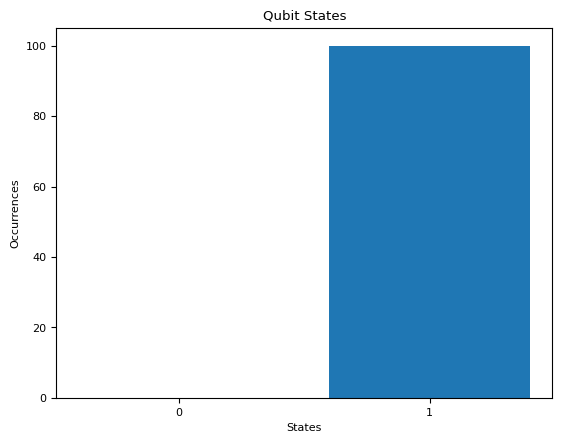

In [ ]:
# NOISY CHANNEL
noisy_channel_circuit = cirq.Circuit()
noisy_channel_circuit.append(cirq.X.on_each(qubits[1], qubits[2]))

# SIMULATING
bitflip_circuit = encode_circuit + noisy_channel_circuit + detection_circuit + correction_circuit + decode_circuit

sim = cirq.Simulator()
result = sim.run(bitflip_circuit, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

### **Followup Activities**

To further hone your understanding of the bit flip code, consider trying the following activities:
* Remove parts of the circuit such as the parity checks or error correcting Toffoli to see what happens and understand their role better.
* Alter this code to correct for an error on a different qubit.
* Expand this 3 qubit error correcting code to a 4+ qubit error correcting code. Can these sustain more errors than the one above? Are there patterns to how many errors an *n* qubit code can handle?

<a name = "p2"></a>

---
## **Part 2: Cirq Noise Models**
---

In this section, we will use cirq's [`NoiseModel`](https://quantumai.google/reference/python/cirq/NoiseModel) and [`DensityMatrixSimulator`](https://quantumai.google/reference/python/cirq/DensityMatrixSimulator) to put our bit flip code to the test.

<br>

**Run the code below to ensure each part of this bit flip code from above is defined.**

In [ ]:
# ENCODE
qubits = cirq.NamedQubit.range(3, prefix = 'q')
encode_circuit = cirq.Circuit()
encode_circuit.append(cirq.CNOT(qubits[0], qubits[1]))
encode_circuit.append(cirq.CNOT(qubits[0], qubits[2]))

# PREPARATION
prepare_circuit = cirq.Circuit()
prepare_circuit.append(cirq.I(qubits[0]))

# NOISY CHANNEL
noisy_channel_circuit = cirq.Circuit()
noisy_channel_circuit.append(cirq.X(qubits[1]))

# DETECTION
detection_circuit = cirq.Circuit()
detection_circuit.append(cirq.CNOT(qubits[0], qubits[1]))
detection_circuit.append(cirq.CNOT(qubits[0], qubits[2]))

# CORRECTION
correction_circuit = cirq.Circuit()
correction_circuit.append(cirq.CCNOT(qubits[2], qubits[1], qubits[0]))

# DECODE
decode_circuit = cirq.Circuit()
decode_circuit.append(cirq.measure(qubits[0]))


# COMBINING
bitflip_circuit = prepare_circuit + encode_circuit + noisy_channel_circuit + detection_circuit + correction_circuit + decode_circuit

#### **Problem #2.1**

**Together**, let's review how to work with these objects by creating a circuit that prepares the Bell state, $\frac{1}{\sqrt 2}(|00\rangle + |11\rangle)$, and simulates it 100 times with a 5% chance of depolarizing noise.

<br>

Then, let's change the amount of noise present to explore the role that this plays. Make sure to try all extreme values (i.e. 0% and 100%, along with a few between these). Apply this same approach to all the problems in this section that follow.

In [ ]:
# Create qubits and circuit
qubits = cirq.NamedQubit.range(2, prefix = 'q')
circuit = cirq.Circuit()

circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.measure(qubits))

# Define a noise model
noise = # COMPLETE THIS LINE

# Create a simulator that uses the noise model
simulator = # COMPLETE THIS LINE

# Simulate the circuit
result = simulator.run(circuit, repetitions=1000)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(2))

plt.show()

##### **Solution**

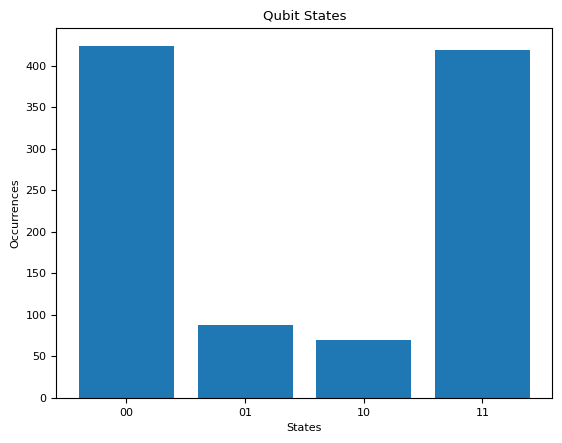

In [ ]:
# Create qubits and circuit
qubits = cirq.NamedQubit.range(2, prefix = 'q')
circuit = cirq.Circuit()

circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.measure(qubits))

# Define a noise model
noise = cirq.depolarize(0.05)

# Create a simulator that uses the noise model
simulator = cirq.DensityMatrixSimulator(noise=noise)

# Simulate the circuit
result = simulator.run(circuit, repetitions=1000)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(2))

plt.show()

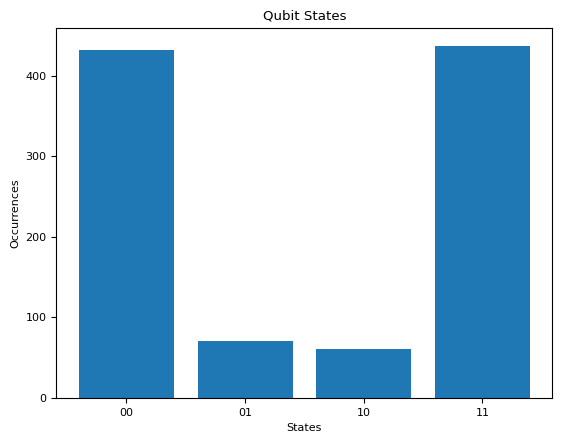

In [ ]:
# Create qubits and circuit
qubits = cirq.NamedQubit.range(2, prefix = 'q')
circuit = cirq.Circuit()

circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.measure(qubits))

# Define a noise model
noise = cirq.depolarize(0.05)

# Create a simulator that uses the noise model
simulator = cirq.DensityMatrixSimulator(noise=noise)

# Simulate the circuit
result = simulator.run(circuit, repetitions=1000)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(2))

plt.show()

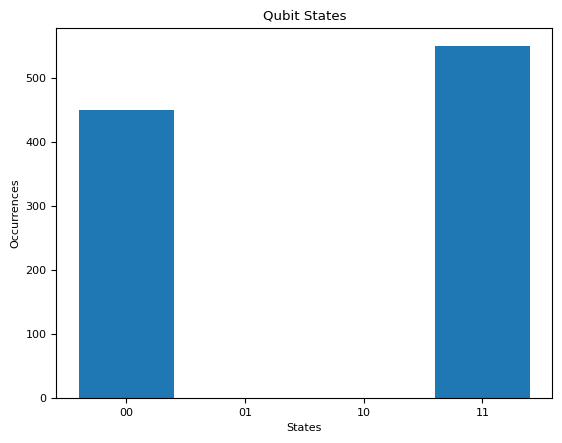

In [ ]:
# Define a noise model
noise = cirq.depolarize(0.00)

# Create a simulator that uses the noise model
simulator = cirq.DensityMatrixSimulator(noise=noise)

# Simulate the circuit
result = simulator.run(circuit, repetitions=1000)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(2))

plt.show()

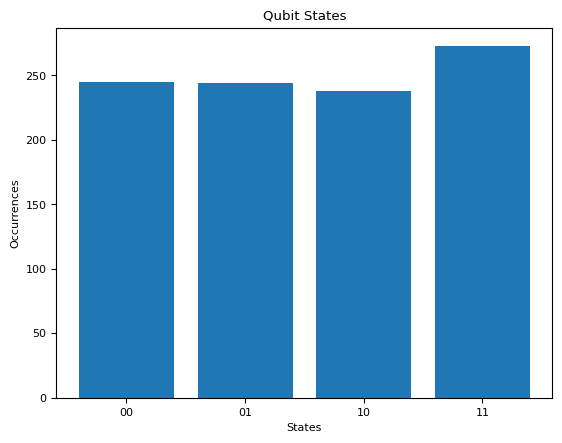

In [ ]:
# Define a noise model
noise = cirq.depolarize(1.00)

# Create a simulator that uses the noise model
simulator = cirq.DensityMatrixSimulator(noise=noise)

# Simulate the circuit
result = simulator.run(circuit, repetitions=1000)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(2))

plt.show()

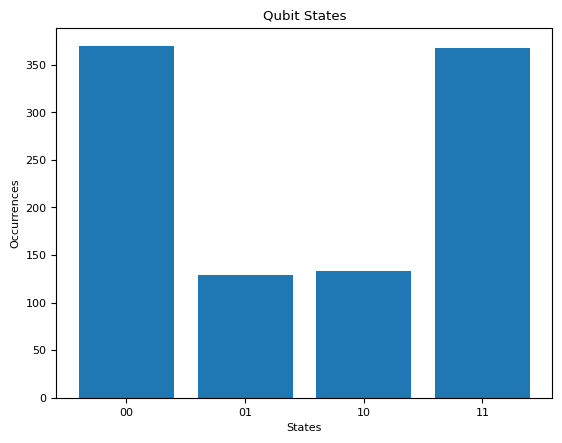

In [ ]:
# Define a noise model
noise = cirq.depolarize(0.10)

# Create a simulator that uses the noise model
simulator = cirq.DensityMatrixSimulator(noise=noise)

# Simulate the circuit
result = simulator.run(circuit, repetitions=1000)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(2))

plt.show()

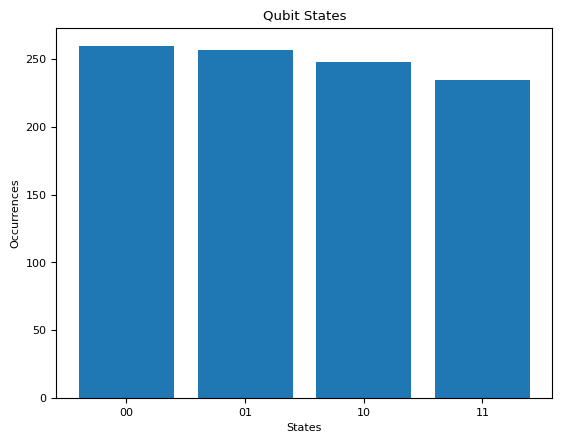

In [ ]:
# Define a noise model
noise = cirq.depolarize(0.5)

# Create a simulator that uses the noise model
simulator = cirq.DensityMatrixSimulator(noise=noise)

# Simulate the circuit
result = simulator.run(circuit, repetitions=1000)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(2))

plt.show()

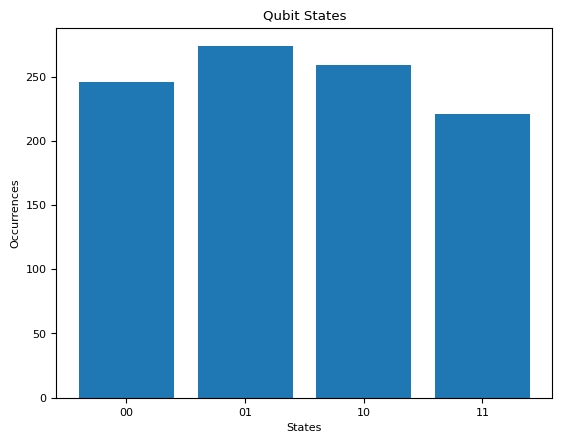

In [ ]:
# Define a noise model
noise = cirq.depolarize(0.9)

# Create a simulator that uses the noise model
simulator = cirq.DensityMatrixSimulator(noise=noise)

# Simulate the circuit
result = simulator.run(circuit, repetitions=1000)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(2))

plt.show()

#### **Problem #2.2**

**Together**, let's now simulate our bitflip circuit with everything *except the noisy channel*. In this way, we simulate a truly noisy environment where no part of our circuit is safe.

In [ ]:
# Create circuit
bitflip_circuit = prepare_circuit + encode_circuit + detection_circuit + correction_circuit + decode_circuit

# COMPLETE THIS CODE

##### **Solution**

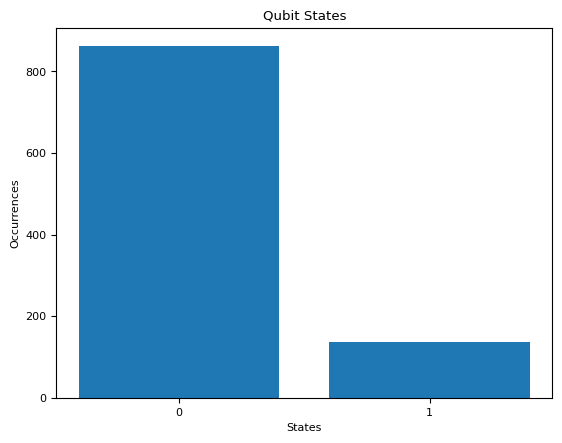

In [ ]:
# Create circuit
bitflip_circuit = prepare_circuit + encode_circuit + detection_circuit + correction_circuit + decode_circuit

# Define a noise model
noise = cirq.depolarize(0.05)

# Create a simulator that uses the noise model
simulator = cirq.DensityMatrixSimulator(noise=noise)

# Simulate the circuit
result = simulator.run(bitflip_circuit, repetitions=1000)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

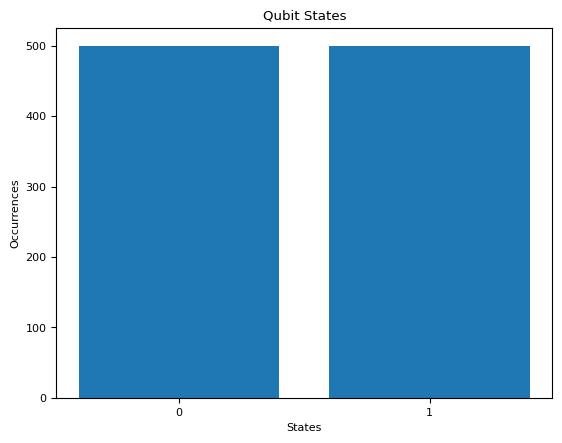

In [ ]:
# Create circuit
bitflip_circuit = prepare_circuit + encode_circuit + detection_circuit + correction_circuit + decode_circuit

# Define a noise model
noise = cirq.depolarize(0.5)

# Create a simulator that uses the noise model
simulator = cirq.DensityMatrixSimulator(noise=noise)

# Simulate the circuit
result = simulator.run(bitflip_circuit, repetitions=1000)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

#### **Problem #2.3**

**Together**, let's now simulate our bitflip circuit the same way as above, but using `cirq.bit_flip(...)` as our noise model. In this way, we are being a bit fairer in testing the ability of our code that's only built handle bit flips and not general depolarizing noise.

In [ ]:
# Create circuit
bitflip_circuit = prepare_circuit + encode_circuit + detection_circuit + correction_circuit + decode_circuit

# COMPLETE THIS CODE

##### **Solution**

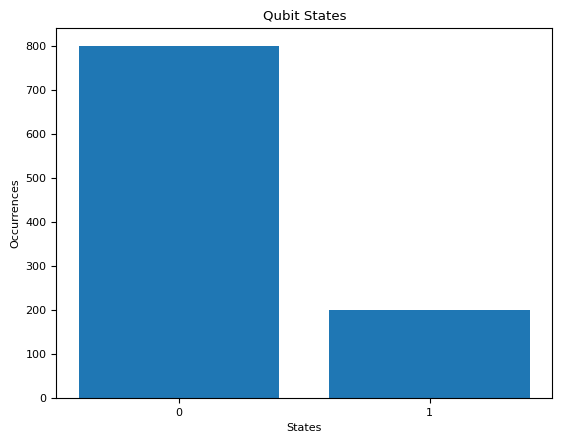

In [ ]:
# Create circuit
bitflip_circuit = prepare_circuit + encode_circuit + detection_circuit + correction_circuit + decode_circuit

# Define a noise model
noise = cirq.bit_flip(0.05)

# Create a simulator that uses the noise model
simulator = cirq.DensityMatrixSimulator(noise=noise)

# Simulate the circuit
result = simulator.run(bitflip_circuit, repetitions=1000)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

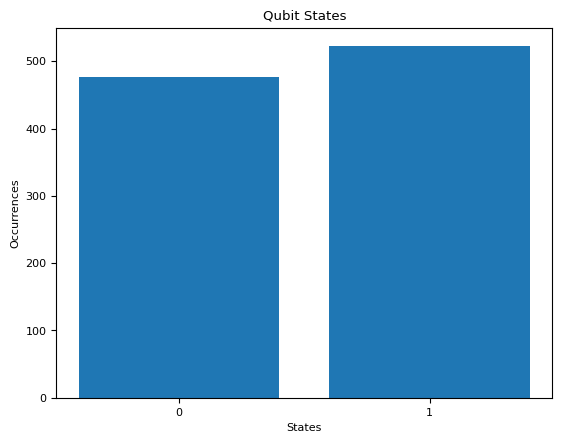

In [ ]:
# Create circuit
bitflip_circuit = prepare_circuit + encode_circuit + detection_circuit + correction_circuit + decode_circuit

# Define a noise model
noise = cirq.bit_flip(0.5)

# Create a simulator that uses the noise model
simulator = cirq.DensityMatrixSimulator(noise=noise)

# Simulate the circuit
result = simulator.run(bitflip_circuit, repetitions=1000)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

#### **Problem #2.4**

**Together**, let's now simulate our bitflip circuit such that the noise model only acts on $q_0$ and can therefore be added directly into the circuit. Add it between encoding and detection to properly recreate the "noisy channel".

<br>

**NOTE**: To recreate a situation like this in a lab would require extensive engineering to ensure all the other qubits had a 0% probability of error at all times and $q_0$ could only incur errors during this one stage of the circuit.

In [ ]:
# Define a noise model
noise = cirq.bit_flip(0.05)# COMPLETE THIS CODE

# Create circuit
bitflip_circuit = # COMPLETE THIS CODE

# Create a simulator that uses the noise model
simulator = cirq.DensityMatrixSimulator()

# Simulate the circuit
result = simulator.run(bitflip_circuit, repetitions=1000)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

##### **Solution**

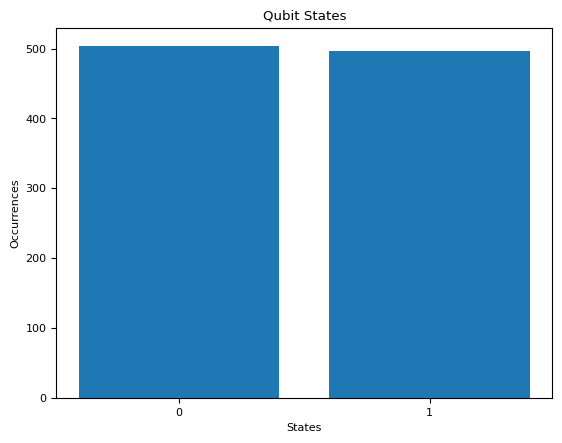

In [ ]:
# Define a noise model
noise = cirq.bit_flip(0.05).on(qubits[0])

# Create circuit
bitflip_circuit = prepare_circuit + encode_circuit + noise + detection_circuit + correction_circuit + decode_circuit

# Create a simulator that uses the noise model
simulator = cirq.DensityMatrixSimulator()

# Simulate the circuit
result = simulator.run(bitflip_circuit, repetitions=1000)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

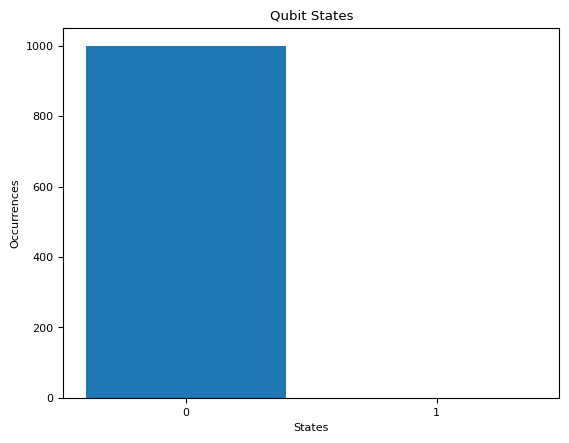

In [ ]:
# Define a noise model
noise = cirq.bit_flip(1.0).on(qubits[0])

# Create circuit
bitflip_circuit = prepare_circuit + encode_circuit + noise + detection_circuit + correction_circuit + decode_circuit

# Create a simulator that uses the noise model
simulator = cirq.DensityMatrixSimulator()

# Simulate the circuit
result = simulator.run(bitflip_circuit, repetitions=1000)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

#### **Problem #2.5**

**Independently**, simulate the bitflip circuit such that the noise model acts on all the qubits during the noisy channel stage.

In [ ]:
# Define a noise model
noise = cirq.bit_flip(0.05)# COMPLETE THIS CODE

# Create circuit
bitflip_circuit = # COMPLETE THIS CODE

# Create a simulator that uses the noise model
simulator = cirq.DensityMatrixSimulator()

# Simulate the circuit
result = simulator.run(bitflip_circuit, repetitions=1000)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

##### **Solution**

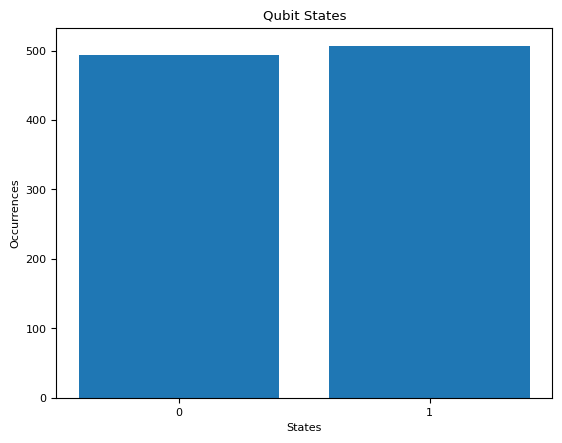

In [ ]:
# Define a noise model
noise = cirq.bit_flip(0.05).on_each(qubits)

# Create circuit
bitflip_circuit =  prepare_circuit + encode_circuit + noise + detection_circuit + correction_circuit + decode_circuit

# Create a simulator that uses the noise model
simulator = cirq.DensityMatrixSimulator()

# Simulate the circuit
result = simulator.run(bitflip_circuit, repetitions=1000)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

#### **[OPTIONAL] Problem #2.6**

Simulate the bitflip circuit in the exact same way as in the Problem above, *except* preparing the logical $|1\rangle$ state.

In [ ]:
# Define a noise model
noise = cirq.bit_flip(0.05)# COMPLETE THIS CODE

# Create circuit
prepare_circuit = cirq.Circuit()
prepare_circuit# COMPLETE THIS CODE

bitflip_circuit = # COMPLETE THIS CODE

# Create a simulator that uses the noise model
simulator = cirq.DensityMatrixSimulator()

# Simulate the circuit
result = simulator.run(bitflip_circuit, repetitions=1000)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

##### **Solution**

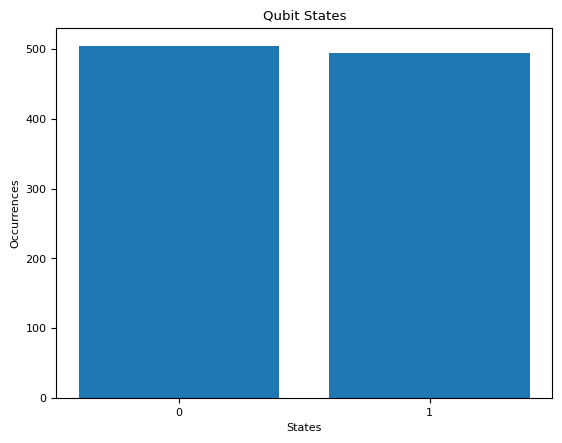

In [ ]:
# Define a noise model
noise = cirq.amplitude_damp(0.5).on_each(qubits)

# Create circuit
prepare_circuit = cirq.Circuit()
prepare_circuit.append(cirq.X(qubits[0]))
bitflip_circuit = prepare_circuit + encode_circuit + noise + detection_circuit + correction_circuit + decode_circuit

# Create a simulator that uses the noise model
simulator = cirq.DensityMatrixSimulator()

# Simulate the circuit
result = simulator.run(bitflip_circuit, repetitions=1000)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

#### **[OPTIONAL] Problem #2.7**

Now, simulate the bitflip circuit with just phase flip noise on $q_0$ instead. Prepare the logical $|+\rangle$ state to start, but explore preparing other states if you have time.

<br>

**NOTE**: Recall from Problems #1.3 - 1.4 that we should rotate the qubit into the computational basis right before decoding (measuring) to ensure we can interpret our results. This can be accomplished by applying an H gate to $q_0$.

In [ ]:
# Define a noise model
noise = # COMPLETE THIS CODE

# Create circuit
prepare_circuit = cirq.Circuit()
prepare_circuit# COMPLETE THIS CODE

bitflip_circuit = # COMPLETE THIS CODE

# Create a simulator that uses the noise model
simulator = cirq.DensityMatrixSimulator()

# Simulate the circuit
result = simulator.run(bitflip_circuit, repetitions=1000)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

##### **Solution**

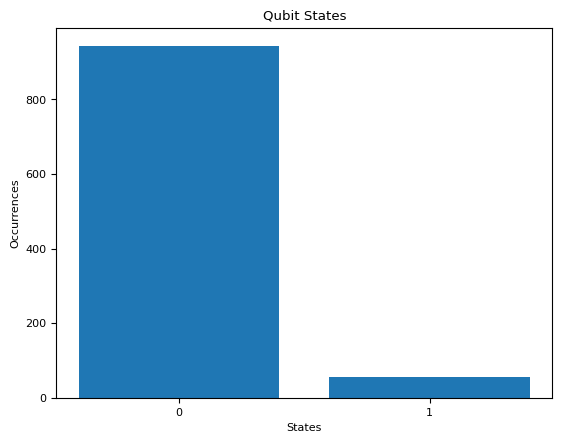

In [ ]:
# Define a noise model
noise = cirq.phase_flip(0.05).on(qubits[0])

# Create circuit
prepare_circuit = cirq.Circuit()
prepare_circuit.append(cirq.H(qubits[0]))
bitflip_circuit = prepare_circuit + encode_circuit + noise + detection_circuit + correction_circuit + cirq.H(qubits[0]) + decode_circuit

# Create a simulator that uses the noise model
simulator = cirq.DensityMatrixSimulator()

# Simulate the circuit
result = simulator.run(bitflip_circuit, repetitions=1000)

# Get the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

#End of notebook
---
© 2024 The Coding School, All rights reserved